- We'll talk about hedging and insurance here

# Benefits of Diversification

- Eliminate unrewarded, idiosyncratic risk

# Limits of Diversification

- Diversification will fail when you need it the most
  - e.g. 2008 when **everything dropped**
- By definition, diversification cannot remove **systematic** risk

So what should you do?

# Hedging

- Hedging == avoiding risk taking
- An effective way to obtain downside protection
- You pay the downside protection by giving up on upside potential
  - **That's why hedging is only okay for already wealthy investors**, i.e. you can pay all your liabilities (company) or lifestyle (person) with your investments
  - Most asset owners need upside exposure, though
  
# Insurance

- Get downside protection while allowing for (a fair amount of) upside potential (unlike hedging)
- "The best of both worlds"
- Insurance is **dynamic hedging**
  - think of it as varying your speed while driving a long distance
  - We'll adjust risk taking as a function of the margin for error

----

# Lab Session: What happens to correlations when markets fall?

Let's construct a market-cap-weighted index

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import sys
sys.path.append('..')
import edhec_risk_kit as erk

In [2]:
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()

In [6]:
ind_return.tail(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [7]:
ind_size.tail(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-11,11721.21,21743.93,87079.79,4962.71,1444.47,11460.11,9579.97,4777.85,6113.67,1663.11,...,17934.51,10505.66,11635.87,7379.17,9513.99,3198.05,15917.02,7298.54,7217.76,10931.44
2018-12,11977.26,22983.02,79739.48,4927.55,1487.62,12189.64,9461.67,5090.94,6395.40,1711.16,...,18378.40,10747.36,11060.40,7949.47,10146.79,3294.78,15889.42,7814.50,7431.81,11375.54


In [8]:
ind_nfirms.tail(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-11,55,11,3,62,21,39,29,626,66,8,...,69,434,280,36,69,95,141,61,635,128
2018-12,55,11,3,62,21,39,29,623,66,8,...,69,429,277,36,68,95,140,60,633,127


### Now, to find out the market cap of each of these industry portfolios over time:

(we don't care about units, the relative values are enough)

In [11]:
ind_mktcap = ind_nfirms * ind_size

In [12]:
ind_mktcap.tail(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-11,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.6,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32
2018-12,658749.30,252813.22,239218.44,305508.10,31240.02,475395.96,274388.43,3171655.62,422096.40,13689.28,...,1268109.60,4610617.44,3063730.8,286180.92,689981.72,313004.10,2224518.80,468870.00,4704335.73,1444693.58


In [15]:
total_mktcap = ind_mktcap.sum(axis="columns")

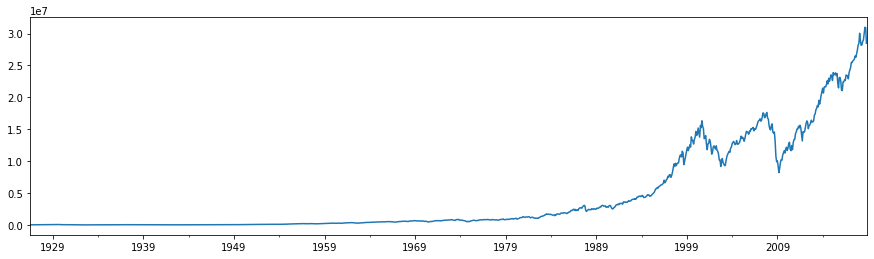

In [43]:
total_mktcap.plot(figsize=(15,4))

In [25]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719


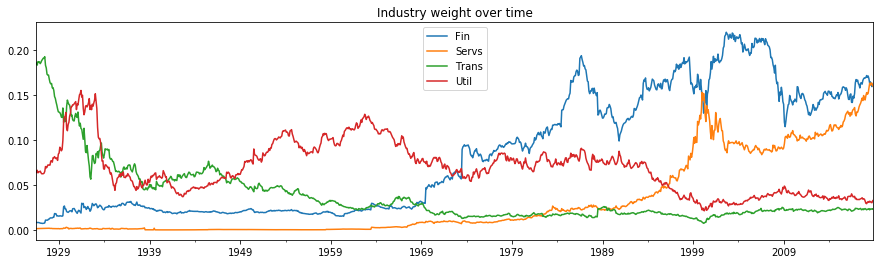

In [42]:
ind_capweight.loc[:, ['Fin', 'Servs', 'Trans', 'Util']].plot(title="Industry weight over time", figsize=(15, 4))

In [56]:
total_market_return = (ind_capweight * ind_return).sum(axis='columns')
total_market_index = erk.drawdown(total_market_return)['Wealth']

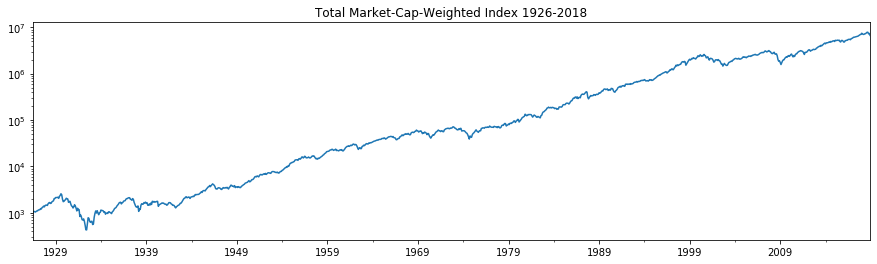

In [61]:
total_market_index.plot(title="Total Market-Cap-Weighted Index 1926-2018", figsize=(15,4), logy=True)

### Now let's get trailing 36-month returns (for correlations later)

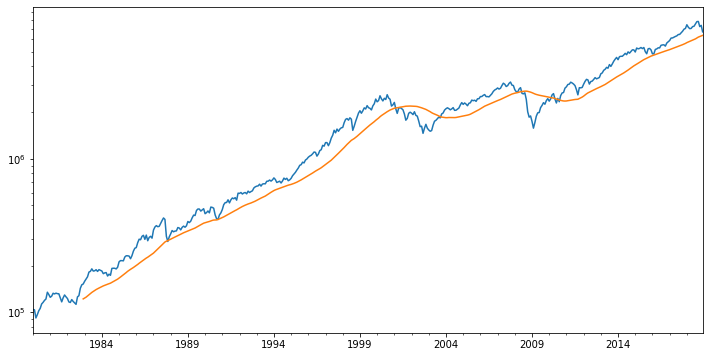

In [67]:
total_market_index["1980":].plot(figsize=(12, 6), logy=True)
total_market_index["1980":].rolling(36).mean().plot()

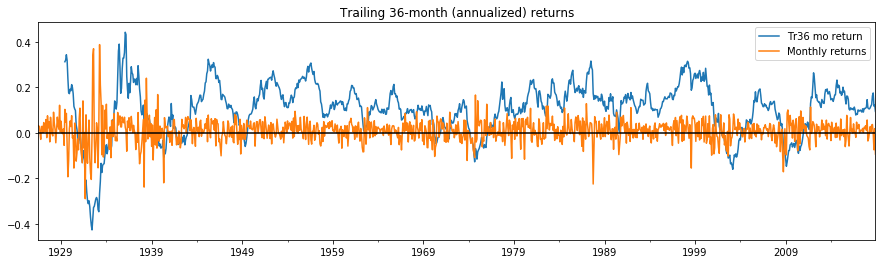

In [75]:
# Use a proper compounding, not a .mean() method:
# The variable is called "total market index, trailing 36-month returns":
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)

ax = tmi_tr36rets.plot(title="Trailing 36-month (annualized) returns", figsize=(15,4),
                       label="Tr36 mo return", legend=True)
total_market_return.plot(label="Monthly returns", legend=True)
ax.axhline(y=0, c='black')

### Now we want to see the relation (i.e. correlation :D) between this tr36 return and the tr36 correlations

- We'll just use the average correlation between the industries
- Incoming: MultiIndexes and `.groupby()`

In [79]:
ts_corr = ind_return.rolling(36).corr()
# This is a time series of *matrices* :D
ts_corr.index.names = ['date', 'industry']

In [83]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

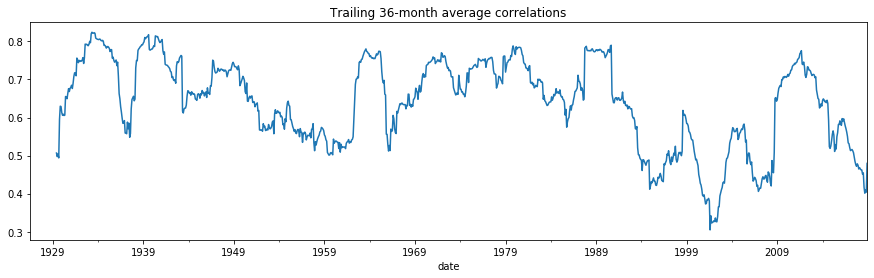

In [85]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot(title='Trailing 36-month average correlations', figsize=(15, 4))

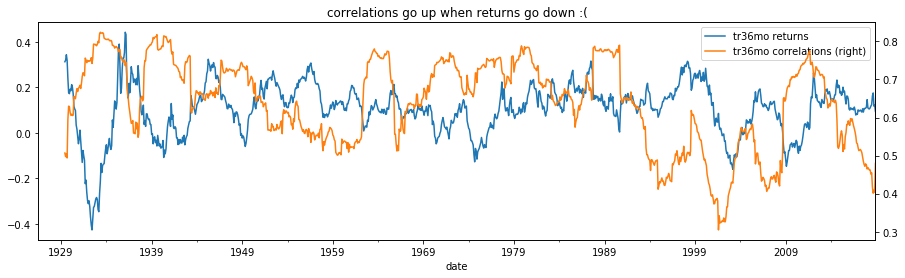

In [93]:
tmi_tr36rets.plot(figsize=(15, 4), label='tr36mo returns', legend=True, 
                  title='correlations go up when returns go down :(')
ind_tr36corr.plot(label='tr36mo correlations', legend=True,
                 secondary_y=True,  # makes superimposing two time series easier: 2nd y-axis on right side
                 )

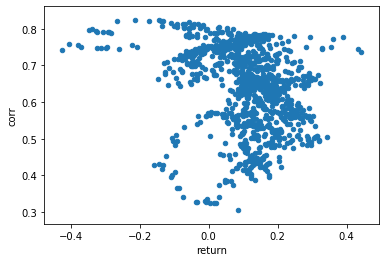

In [89]:
pd.DataFrame({'return': tmi_tr36rets, 'corr': ind_tr36corr}).plot.scatter('return', 'corr')

In [95]:
# Sum it up in one number: 
# The correlation between the returns and the average correlation is negative
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884126

### -> Diversification fails you, just when you need it the most

----

# An introduction to CPPI

- Constant Proportion Portfolio Insurance
- It's a insurance strategy to generate convex, option-like payoffs without using options
- Dynamically allocate between a risky asset and a safe asset
- You define a floor for your net worth. Then you have a "cushion" $C$. And you allocate a multiple $M*C$ to risky assets
- When reaching the floor, you allocate everything in safe assets.

----

- Example: $M=3$ and an 80% wealth preservation floor.
- \\$100 net worth, i.e. \\$20 cushion. Allocate \\$60 in risky assets

----

- You have to be willing to trade often, ideally continuously. Otherwise your assets can fall below the floor! (called **gap risk**)
- Calibrate the multiplier to the inverse of the maximum potential loss within a trading interval.
  - If $M=5$, then a 20\% loss would put you below your defined floor